### In this notebook, we would use Linear Regression model for prediction.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Real-Data/Real_Combine.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       703 non-null    float64
 1   TM      703 non-null    float64
 2   Tm      703 non-null    float64
 3   SLP     703 non-null    float64
 4   H       703 non-null    float64
 5   VV      703 non-null    float64
 6   V       703 non-null    float64
 7   VM      703 non-null    float64
 8   PM 2.5  702 non-null    float64
dtypes: float64(9)
memory usage: 49.6 KB


In [4]:
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,702.000000
mean,24.098009,30.487624,19.684211,65.475107,2.938165,6.683642,3.812518,6.865718,109.955532
std,2.306289,2.839421,2.251266,14.740167,10.074998,0.671883,2.254704,3.370355,84.144679
min,18.900000,22.000000,12.900000,25.000000,0.000000,4.000000,0.200000,1.900000,0.000000
25%,22.500000,28.400000,18.600000,55.000000,0.000000,6.300000,2.200000,5.400000,43.604167
50%,23.700000,30.100000,20.000000,68.000000,0.000000,6.900000,3.500000,5.400000,82.854167
75%,25.300000,32.100000,20.800000,77.000000,0.510000,6.900000,5.000000,7.600000,158.093750
max,31.200000,37.600000,25.800000,97.000000,132.330000,9.200000,12.400000,37.000000,404.500000


In [7]:
data['PM 2.5'].loc[data['PM 2.5']== None]

Series([], Name: PM 2.5, dtype: float64)

In [8]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       702 non-null    float64
 1   TM      702 non-null    float64
 2   Tm      702 non-null    float64
 3   SLP     702 non-null    float64
 4   H       702 non-null    float64
 5   VV      702 non-null    float64
 6   V       702 non-null    float64
 7   VM      702 non-null    float64
 8   PM 2.5  702 non-null    float64
dtypes: float64(9)
memory usage: 54.8 KB


In [12]:
X = data.iloc[:,:-1]
Y=data.iloc[:,-1]

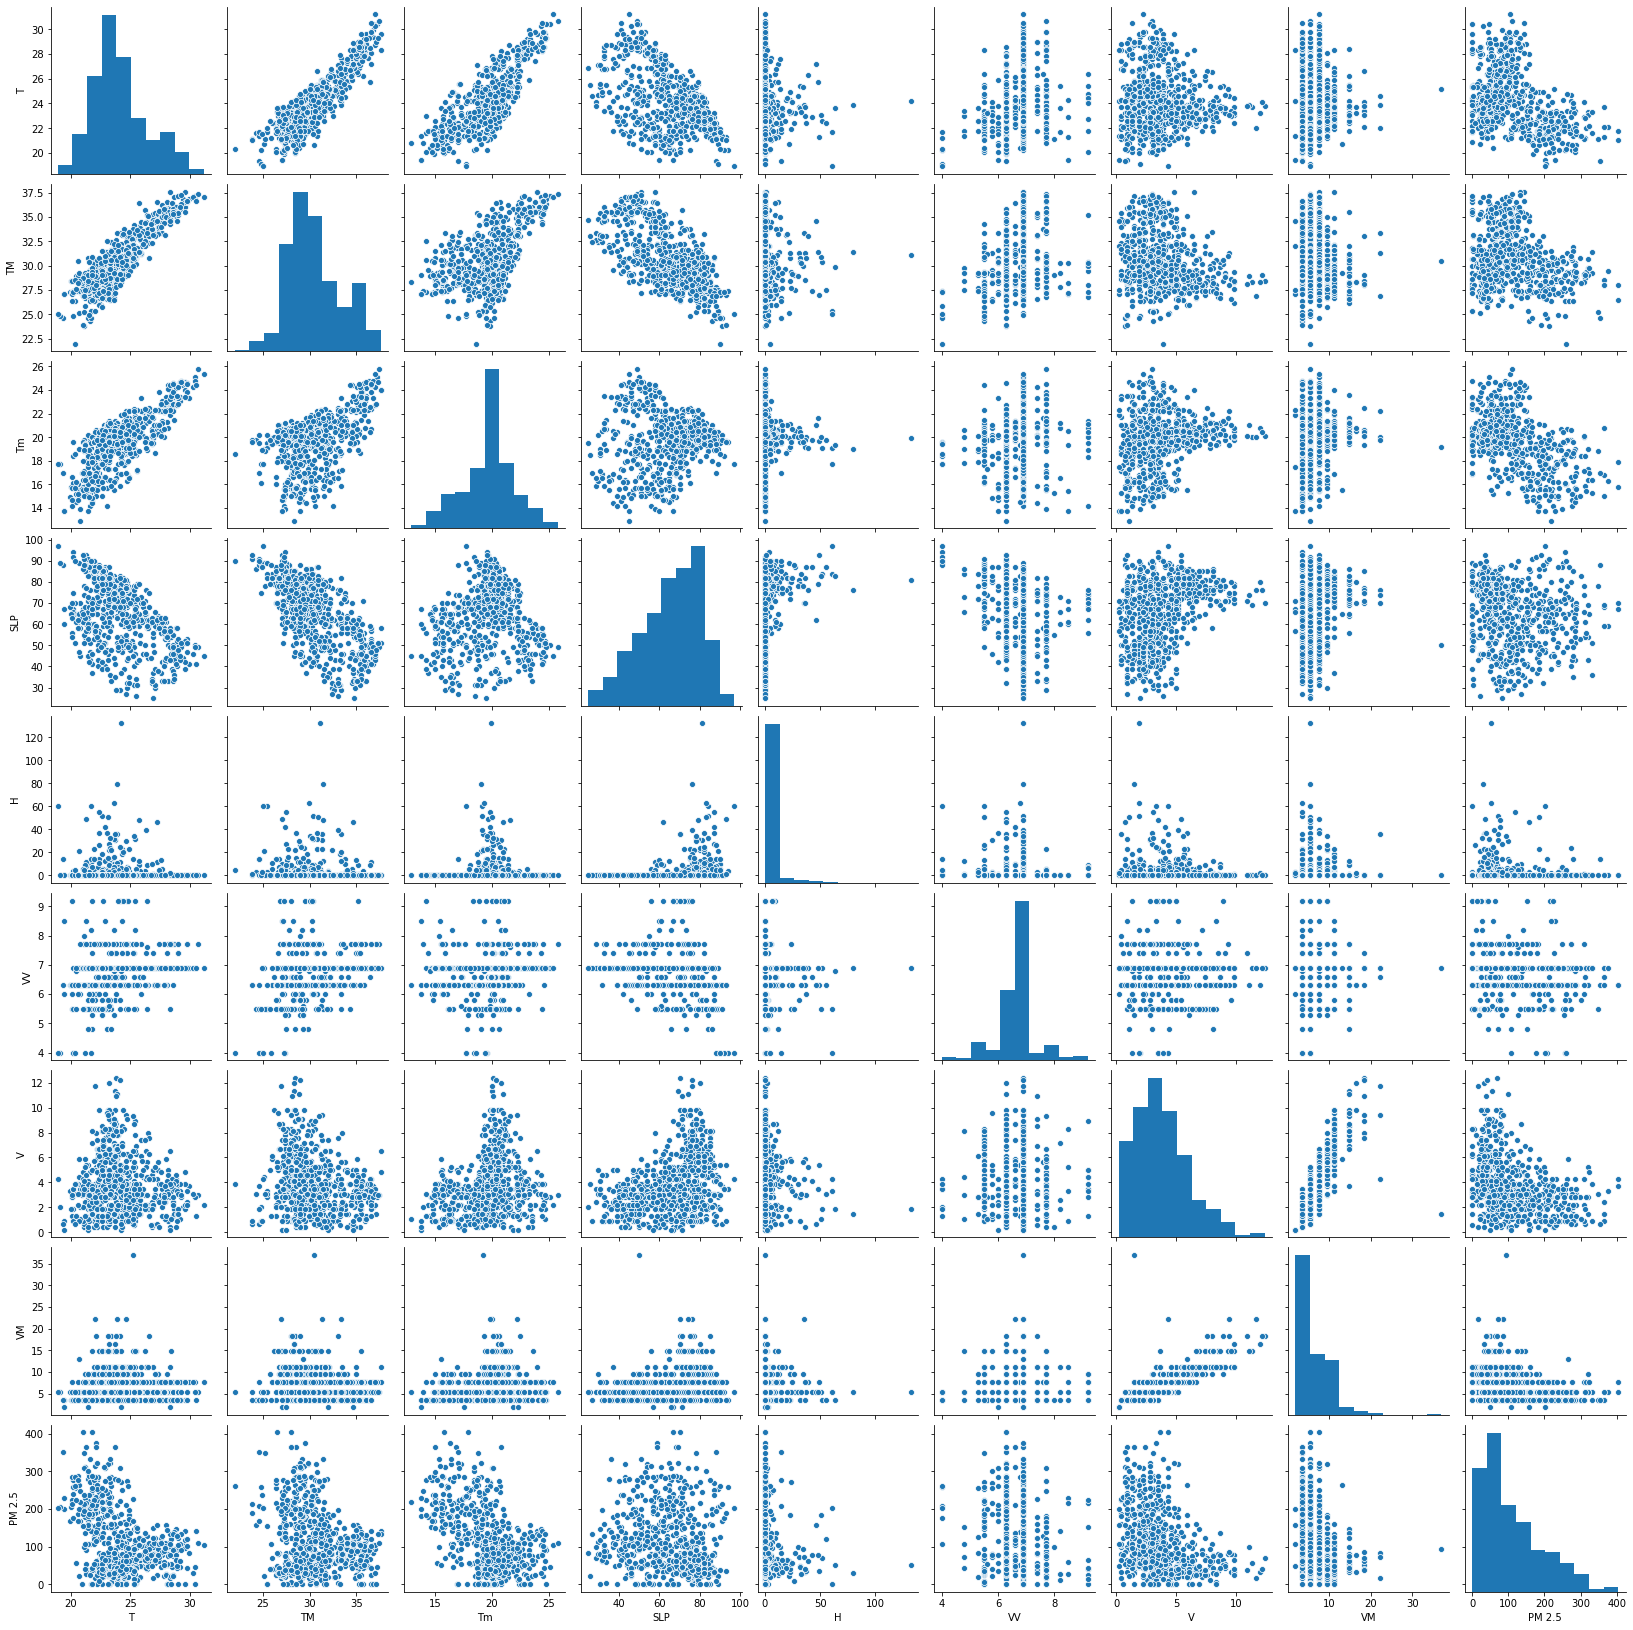

In [18]:
sns.pairplot(data)

### As we could see above, that the relationship is not linear, hence the Linear regression cannot have a best fit line for all features.

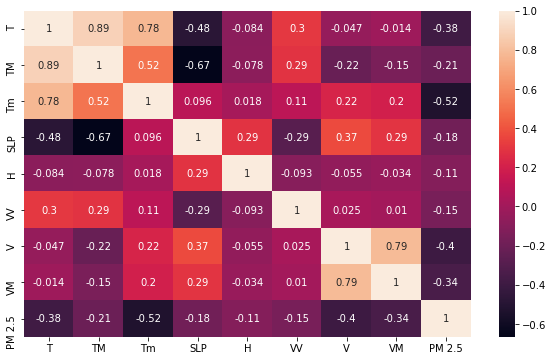

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Feature Importance

Feature importance would be helpful to identify the list of independent features that would be important for calc the TV. The Tree based algo's would usually have the Feature importance as part of the algo, however in Linear regresison, since we don't have one, we can use ExtraTreeRegressor to pickup the top features in their importance to affect the TV.

Infact even corr and the above heatmap can help you to find the highly correlated metrics

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [23]:
model.feature_importances_

array([0.18910774, 0.10971631, 0.26222376, 0.10031606, 0.05006201,
       0.0656244 , 0.14540921, 0.07754051])

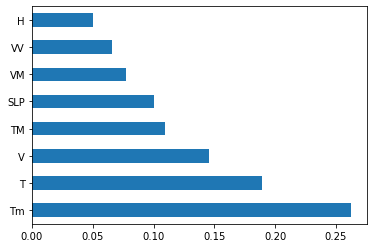

In [37]:
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

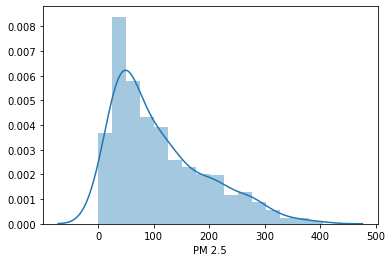

In [38]:
sns.distplot(Y)

### Above distplot shows that the Dependent feature is right-skewed

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
model_lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [42]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [48]:
Y_pred_test = model_lr.predict(X_test)
Y_pred_train = model_lr.predict(X_train)

In [46]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(Y_test,Y_pred_test))
rmse

67.21018307100731

In [47]:
from sklearn.metrics import r2_score
print("R2 score for Test dataset =", r2_score(Y_test,Y_pred_test))

R2 score for Test dataset = 0.3007409412760551


In [49]:
print("R2 score for Train dataset =", r2_score(Y_train,Y_pred_train))

R2 score for Train dataset = 0.4255129294262524


In [50]:
print("Coefficient of determination R^2 on train set {}".format(model_lr.score(X_train,Y_train)))

Coefficient of determination R^2 on train set 0.4255129294262524


In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_lr,X,Y,cv=5)

In [53]:
score.mean()

0.2781066474354511

### Let's interpret the coefficients

In [58]:
coeffs = pd.DataFrame(model_lr.coef_,index=X.columns,columns=['Co-efficients'])
coeffs

,Co-efficients
T,-21.879436
TM,1.274355
Tm,0.159117
SLP,-1.824576
H,-0.800976
VV,-10.462797
V,-10.452137
VM,-0.751879


#Interpreting the co-efficients :

- Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 21.87 in AQI PM2.5

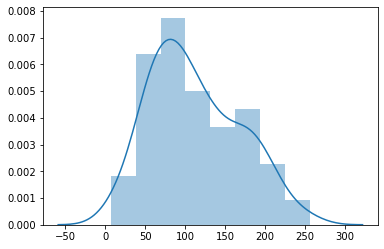

In [59]:
sns.distplot(Y_pred_test)

In [60]:
import pickle

In [64]:
file = 'Linear_Regression.sav'
pickle.dump(model_lr,open(file,'wb'))

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_test = model_lr.predict(X_test)

print("Mean Absoute Error = ",mean_absolute_error(Y_test,y_pred_test))
print("Mean squared Error = ",mean_squared_error(Y_test,y_pred_test))
print("R^2  = ",r2_score(Y_test,y_pred_test))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,y_pred_test)))

Mean Absoute Error =  53.729659851404826
Mean squared Error =  4517.208708438317
R^2  =  0.3007409412760551
RMSE =  67.21018307100731
